93909426587.05702
93897190169.85333
93897191764.24997
93884957109.75586
93884958703.9008
93512359848.19836
93512358211.22002
93141395029.17195
93141391775.76755
92772054305.15326
92772051069.68243
91272902476.5443
91272880844.92311
91626470865.84956
91626458085.83691
90496443111.18526
90496457609.41673
89381804691.46698
89381805955.57912
88282260878.26958
88282262126.86646
86127549233.94737
86127555040.23274
84030498569.52214
84030494964.74168
81989313276.83302
81989309646.95546
80002291090.90346
80002290500.40735
78067791977.71735
78067791399.72311
73065838514.6785
73065826239.72824
68410135656.473915
68410127398.819336
64073657477.67689
64073689707.6287
60031958078.53926
60031968060.02615
56262607390.63496
56262613480.91167
52745231699.95299
52745237121.608246
48432625007.44138
48432636077.489044
44492233690.689186
44492239052.86661
40888989557.60915
40888969324.83534
37591502413.498
37591494495.08179
34571763878.89139
34571761243.755165
31804604753.495987
31804602702.305283
29267396

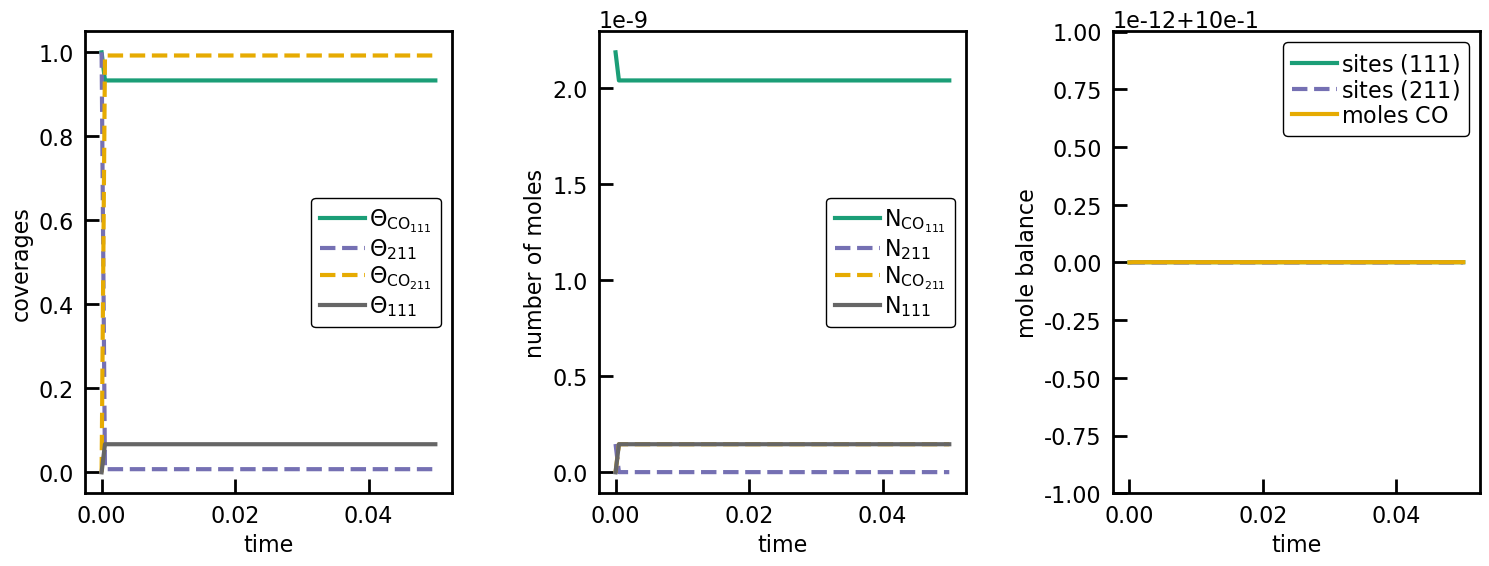

In [7]:
#Example for the diffusion between a (111) and (211) facet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.columnspacing'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits'] = (-3, 6)

colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 4)]

#define all the relevant parameters
T=773 #K
delta_G=-14.446244937001836*1e3 #J/mol
R=8.314 #J/K/mol
K=np.exp(-delta_G/T/R)

A=1e13 #1/s
Ea=30 *1e3 #J/mol

kf=A*np.exp(-Ea/R/T) #1/s
kr=kf/K #1/s

#Surface site densities
Gamma111=3.16e-09 #mol/cm2
Gamma211=3.36e-09 #mol/cm2

a111=0.6923 #surface area of a Ni111 in m2 (assuming that the overall surface area is 1m2)
a211=0.0439 #surface area of a Ni211 in m2 (assuming that the overall surface area is 1m2)

M211=Gamma211*a211 
M111=Gamma111*a111

Mint_M111=1*M211/M111 #dimensionless
Mint_M211=1 #dimensionless

def model(z,t):
    Theta_CO111=z[0]
    Theta_211=z[1]
    Theta_CO211=z[2]
    Theta_111=z[3]
    r=z[4]
    r=kf*Theta_CO111*Theta_211 -kr*Theta_CO211*Theta_111 #1/s
    dTheta_CO111dt=Mint_M111*-r #1/s
    dTheta_211dt=Mint_M211*-r #1/s
    dTheta_CO211dt=Mint_M211*r #1/s
    dTheta_111dt=Mint_M111*r #1/s
    dzdt=[dTheta_CO111dt,dTheta_211dt,dTheta_CO211dt,dTheta_111dt,r]
    print(r)
    return dzdt

#initial conditions
z0=[1,1,0,0,0] #Theta_CO111, Theta_211, Theta_CO211, Theta_111, sdot

#time points
t=np.linspace(0,0.05,100)

#solve ODE
z=odeint(model,z0,t)

#store the results
cov_CO111=z[:,0]
vac_211=z[:,1]
cov_CO211=z[:,2]
vac_111=z[:,3]

# plot results
gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.4, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.plot(t,cov_CO111,color=colors[0],label=r'$\mathrm{\Theta_{CO_{111}}}$')
ax0.plot(t,vac_211,color=colors[1],linestyle='dashed', label=r'$\mathrm{\Theta_{{211}}}$')
ax0.plot(t,cov_CO211,color=colors[2],linestyle='dashed', label=r'$\mathrm{\Theta_{CO_{211}}}$')
ax0.plot(t,vac_111,color=colors[3],label=r'$\mathrm{\Theta_{{111}}}$')
ax0.set_ylabel('coverages')
ax0.set_xlabel('time')
ax0.legend(loc='best')

ax1.plot(t,z[:,0]*M111,color=colors[0],label=r'$\mathrm{N_{CO_{111}}}$')
ax1.plot(t,z[:,1]*M211,color=colors[1],linestyle='dashed', label=r'$\mathrm{N_{{211}}}$')
ax1.plot(t,z[:,2]*M211,color=colors[2],linestyle='dashed', label=r'$\mathrm{N_{CO_{211}}}$')
ax1.plot(t,z[:,3]*M111,color=colors[3],label=r'$\mathrm{N_{{111}}}$')

#Convert coverages into moles
N_CO111=cov_CO111*M111
N_111=vac_111*M111
N_CO211=cov_CO211*M211
N_211=vac_211*M211

balance_sites_111=(N_CO111+N_111)/max(N_CO111[0],N_111[0])
balance_sites_211=(N_CO211+N_211)/max(N_CO211[0],N_211[0])
balance_moles_CO=(N_CO111+N_CO211)/max(N_CO111[0],N_CO211[0])

ax2.plot(t,balance_sites_111,color=colors[0],linestyle='solid', label=r'$\mathrm{sites\ (111)}$')
ax2.plot(t,balance_sites_211,color=colors[1],linestyle='dashed', label=r'$\mathrm{sites\ (211)}$')
ax2.plot(t,balance_moles_CO,color=colors[2],linestyle='solid', label=r'$\mathrm{moles\ CO}$')

ax1.set_ylabel('number of moles')
ax1.set_xlabel('time')
ax1.legend(loc='best')

ax2.set_ylabel('mole balance')
ax2.set_xlabel('time')
ax2.legend(loc='best')
plt.savefig('surface_diffusion.pdf',bbox_inches='tight',transparent=False)
plt.show()

In [24]:
Mint_M111

0.06742522174297015

93909426587.05702
93897190169.85333
93897191764.24997
93884957109.75586
93884958703.9008
93512359848.19836
93512358211.22002
93141395029.17195
93141391775.76755
92772054305.15326
92772051069.68243
91272902476.5443
91272880844.92311
91626470865.84956
91626458085.83691
90496443111.18526
90496457609.41673
89381804691.46698
89381805955.57912
88282260878.26958
88282262126.86646
86127549233.94737
86127555040.23274
84030498569.52214
84030494964.74168
81989313276.83302
81989309646.95546
80002291090.90346
80002290500.40735
78067791977.71735
78067791399.72311
73065838514.6785
73065826239.72824
68410135656.473915
68410127398.819336
64073657477.67689
64073689707.6287
60031958078.53926
60031968060.02615
56262607390.63496
56262613480.91167
52745231699.95299
52745237121.608246
48432625007.44138
48432636077.489044
44492233690.689186
44492239052.86661
40888989557.60915
40888969324.83534
37591502413.498
37591494495.08179
34571763878.89139
34571761243.755165
31804604753.495987
31804602702.305283
29267396

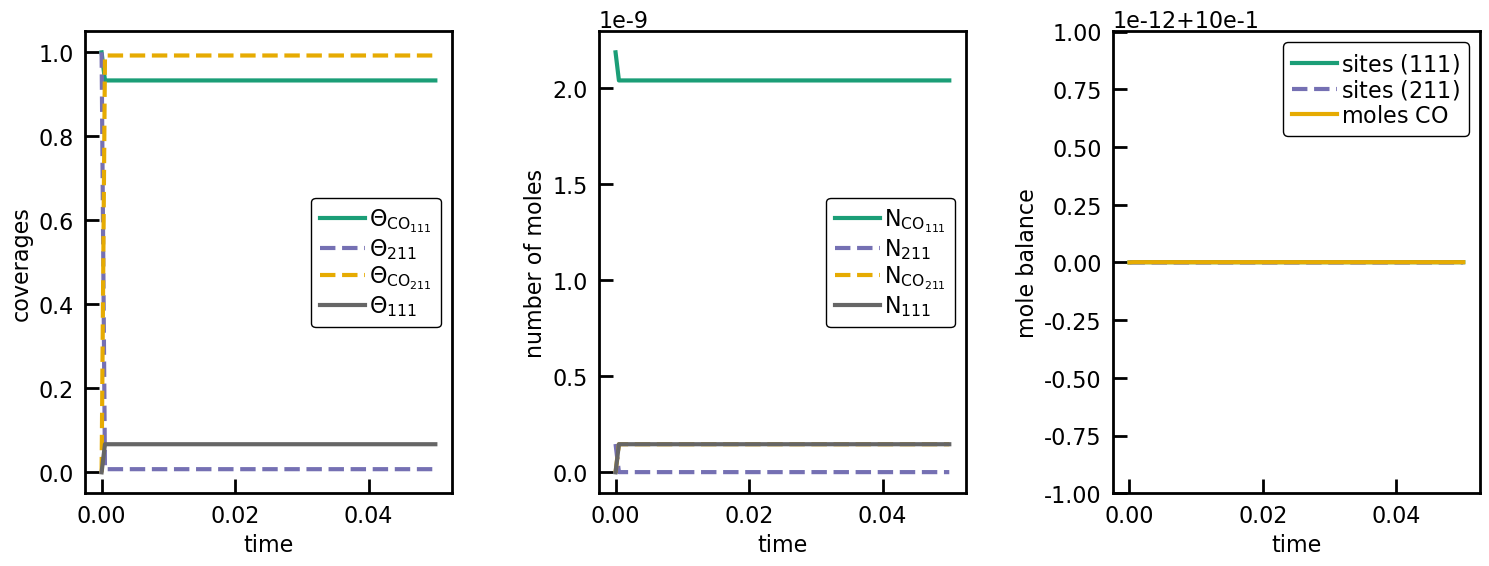

In [12]:
#Example for the diffusion between a (111) and (211) facet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.columnspacing'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits'] = (-3, 6)

colormap = plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 4)]

#define all the relevant parameters
T=773 #K
delta_G=-14.446244937001836*1e3 #J/mol
R=8.314 #J/K/mol
K=np.exp(-delta_G/T/R)

A=1e13 #1/s
Ea=30 *1e3 #J/mol

kf=A*np.exp(-Ea/R/T) #1/s
kr=kf/K #1/s

#Surface site densities
Gamma111=3.16e-09 #mol/cm2
Gamma211=3.36e-09 #mol/cm2

a111=0.6923 #surface area of a Ni111 in m2 (assuming that the overall surface area is 1m2)
a211=0.0439 #surface area of a Ni211 in m2 (assuming that the overall surface area is 1m2)

M211=Gamma211*a211 
M111=Gamma111*a111

Mint_M111=1*M211/M111 #dimensionless
Mint_M211=1 #dimensionless

def model(z,t):
    Theta_CO111=z[0]
    Theta_211=z[1]
    Theta_CO211=z[2]
    Theta_111=z[3]
    r=z[4]
    r=kf*Theta_CO111*Theta_211 -kr*Theta_CO211*Theta_111 #1/s
    dTheta_CO111dt=Mint_M111*-r #1/s
    dTheta_211dt=Mint_M211*-r #1/s
    
    dTheta_CO211dt=Mint_M211*r #1/s
    dTheta_111dt=Mint_M111*r #1/s
    dzdt=[dTheta_CO111dt,dTheta_211dt,dTheta_CO211dt,dTheta_111dt,r]
    print(r)
    return dzdt

#initial conditions
z0=[1,1,0,0,0] #Theta_CO111, Theta_211, Theta_CO211, Theta_111, sdot

#time points
t=np.linspace(0,0.05,100)

#solve ODE
z=odeint(model,z0,t)

#store the results
cov_CO111=z[:,0]
vac_211=z[:,1]
cov_CO211=z[:,2]
vac_111=z[:,3]

# plot results
gs = gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.4, hspace=0.4)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])

ax0.plot(t,cov_CO111,color=colors[0],label=r'$\mathrm{\Theta_{CO_{111}}}$')
ax0.plot(t,vac_211,color=colors[1],linestyle='dashed', label=r'$\mathrm{\Theta_{{211}}}$')
ax0.plot(t,cov_CO211,color=colors[2],linestyle='dashed', label=r'$\mathrm{\Theta_{CO_{211}}}$')
ax0.plot(t,vac_111,color=colors[3],label=r'$\mathrm{\Theta_{{111}}}$')
ax0.set_ylabel('coverages')
ax0.set_xlabel('time')
ax0.legend(loc='best')

ax1.plot(t,z[:,0]*M111,color=colors[0],label=r'$\mathrm{N_{CO_{111}}}$')
ax1.plot(t,z[:,1]*M211,color=colors[1],linestyle='dashed', label=r'$\mathrm{N_{{211}}}$')
ax1.plot(t,z[:,2]*M211,color=colors[2],linestyle='dashed', label=r'$\mathrm{N_{CO_{211}}}$')
ax1.plot(t,z[:,3]*M111,color=colors[3],label=r'$\mathrm{N_{{111}}}$')

#Convert coverages into moles
N_CO111=cov_CO111*M111
N_111=vac_111*M111
N_CO211=cov_CO211*M211
N_211=vac_211*M211

balance_sites_111=(N_CO111+N_111)/max(N_CO111[0],N_111[0])
balance_sites_211=(N_CO211+N_211)/max(N_CO211[0],N_211[0])
balance_moles_CO=(N_CO111+N_CO211)/max(N_CO111[0],N_CO211[0])

ax2.plot(t,balance_sites_111,color=colors[0],linestyle='solid', label=r'$\mathrm{sites\ (111)}$')
ax2.plot(t,balance_sites_211,color=colors[1],linestyle='dashed', label=r'$\mathrm{sites\ (211)}$')
ax2.plot(t,balance_moles_CO,color=colors[2],linestyle='solid', label=r'$\mathrm{moles\ CO}$')

ax1.set_ylabel('number of moles')
ax1.set_xlabel('time')
ax1.legend(loc='best')

ax2.set_ylabel('mole balance')
ax2.set_xlabel('time')
ax2.legend(loc='best')
plt.savefig('surface_diffusion.pdf',bbox_inches='tight',transparent=False)
plt.show()